In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import moth_brain_nengo
import nengo

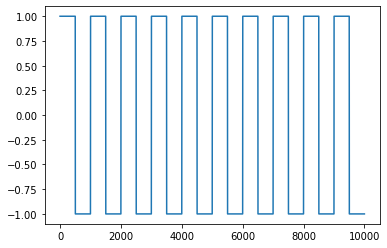

In [2]:
t = np.linspace(0, 10, 10000, endpoint=False)
sq = signal.square(2 * np.pi  * t)
plt.plot(sq)

In [3]:
new_sq_left=[]
for idx,tm in enumerate(t):
    if(int(tm%4)) ==3: 
        new_sq_left.append(0)
    else:
        if sq[idx] < 0:
            new_sq_left.append(0)
        else:
            new_sq_left.append(1)

for idx,tm in enumerate(new_sq_left):
    if(idx%500)< 250:
        new_sq_left[idx]=0

In [4]:
new_sq_right=[]
for idx,tm in enumerate(t):
    if(int(tm%4)) !=3: 
        new_sq_right.append(0)
    else:
        if sq[idx] < 0:
            new_sq_right.append(0)
        else:
            new_sq_right.append(1)

for idx,tm in enumerate(new_sq_right):
    if(idx%500)< 250:
        new_sq_right[idx]=0

In [5]:
def find_left(t):
    idx = int(t * 1000)
    if(idx)> 9999:
        idx=9999
    return new_sq_left[idx]
def find_right(t):
    idx = int(t * 1000)
    if(idx)> 9999:
        idx=9999
    return new_sq_right[idx]

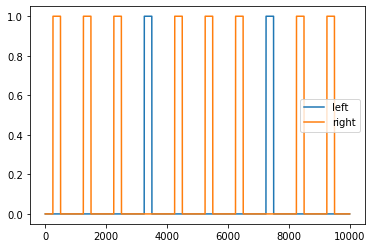

In [6]:
new_sq_left,new_sq_right=new_sq_right,new_sq_left
plt.plot(new_sq_left,label="left")
plt.plot(new_sq_right,label="right")
plt.legend()


In [8]:
model = nengo.Network()
with model:
    brain = moth_brain_nengo.MothBrainNengo(noise=0.02, inhib=0.0)
    
    in_left=nengo.Node(find_left)
    in_right=nengo.Node(find_right)
    nengo.Connection(in_left, brain.inputL ,transform = 1, synapse=None)
    nengo.Connection(in_right, brain.inputR ,transform = 1, synapse=None)
    
    input_left_probe = nengo.Probe(brain.inputL)
    input_right_probe = nengo.Probe(brain.inputR)
    
    PBN_left_probe = nengo.Probe(brain.PBN_l_slow ,synapse=0.03) # ,synapse=0.03
    PBN_right_probe = nengo.Probe(brain.PBN_r_slow,synapse=0.03)  #,synapse=0.03
    
    FF_left_probe = nengo.Probe(brain.stateL,synapse=0.03)# ,synapse=0.03) 
    FF_right_probe = nengo.Probe(brain.stateR,synapse=0.03)# ,synapse=0.03)
    
    
    GII_left_probe=nengo.Probe(brain.giia_l,synapse=0.03)
    GII_right_probe=nengo.Probe(brain.giia_r,synapse=0.03)
    
    turn_probe = nengo.Probe(brain.turn,synapse=0.03)# ) 
    turn_spikes = nengo.Probe(brain.turn.neurons)
    
    
    PBN_left_spikes = nengo.Probe(brain.PBN_l_slow.neurons)
    PBN_right_spikes = nengo.Probe(brain.PBN_r_slow.neurons)
sim = nengo.Simulator(model)
sim.run(10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

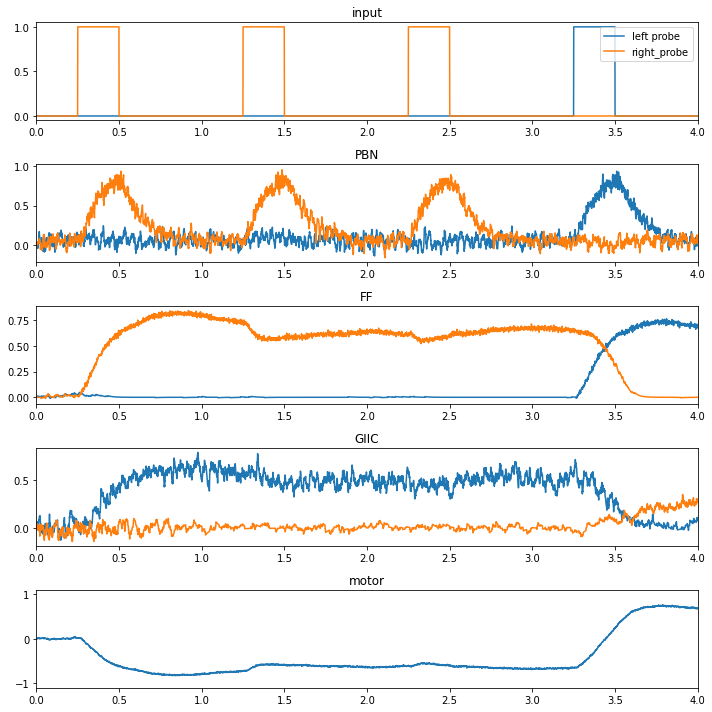

In [16]:
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(sim.trange(), sim.data[input_left_probe],label="left probe")
plt.plot(sim.trange(), sim.data[input_right_probe], label= "right_probe")
plt.xlim([0,4])
plt.title("input")
plt.legend()
plt.subplot(5, 1, 2)
plt.plot(sim.trange(), sim.data[PBN_left_probe],label="left probe")
plt.plot(sim.trange(), sim.data[PBN_right_probe], label= "right_probe")
plt.title("PBN")
plt.xlim([0,4])
plt.subplot(5, 1, 3)
plt.plot(sim.trange(), sim.data[FF_left_probe][:,0],label="left probe")
plt.plot(sim.trange(), sim.data[FF_right_probe][:,0], label= "right_probe")
plt.title("FF")
plt.xlim([0,4])
plt.subplot(5, 1, 4)
plt.plot(sim.trange(), sim.data[GII_left_probe],label="left probe")
plt.plot(sim.trange(), sim.data[GII_right_probe], label= "right_probe")
plt.xlim([0,4])
plt.title("GIIC")
plt.subplot(5, 1, 5)
plt.plot(sim.trange(), sim.data[turn_probe][:,0],label="turn probe")
plt.xlim([0,4])
plt.ylim([-1.1,1.1])
plt.title("motor")
plt.tight_layout()

In [11]:
from nengo.utils.ensemble import response_curves, tuning_curves
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'x along preferred direction')

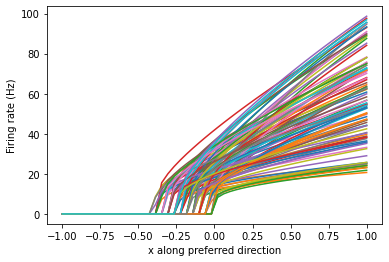

In [12]:
plt.figure()
plt.plot(*response_curves(brain.PBN_l_slow, sim))

plt.ylabel("Firing rate (Hz)")
plt.xlabel("x along preferred direction")